### **Contexto do Problema**

Você trabalha em uma empresa de varejo e precisa prever as vendas mensais de um produto com base no investimento em marketing (em milhares de reais).

---

### **Objetivo**
Desenvolva um modelo de regressão linear para prever as vendas com base no investimento em marketing.

### **Preparando o Ambiente**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [74]:
dados = {
    "Investimentos (x)": [23, 26, 30, 34, 43, 48, 52, 57, 58, 60],
    'Vendas (y)': [651, 762, 856, 1063, 1190, 1298, 1421, 1440, 1518, 1530]
}

In [75]:
dados = pd.DataFrame(dados)

In [76]:
dados.head()

,Investimentos (x),Vendas (y)
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190


### **Análise Exploratória dos Daods**

In [5]:
dados.head()

,Investimentos (x),Vendas(y)
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Investimentos (x)  9 non-null      int64
 1   Vendas(y)          9 non-null      int64
dtypes: int64(2)
memory usage: 276.0 bytes


In [7]:
dados.columns

Index(['Investimentos (x)', 'Vendas(y)'], dtype='object')

In [8]:
dados.describe()

,Investimentos (x),Vendas(y)
count,9.000000,9.000000
mean,41.222222,1133.222222
std,13.405016,317.703784
min,23.000000,651.000000
25%,30.000000,856.000000
50%,43.000000,1190.000000
75%,52.000000,1421.000000
max,58.000000,1518.000000


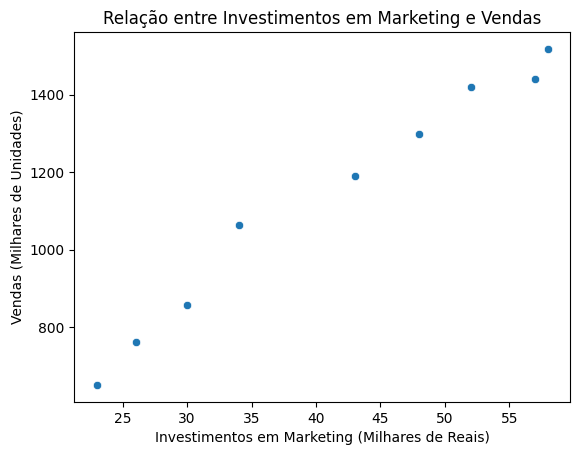

In [9]:
sns.scatterplot(data=dados, x='Investimentos (x)', y='Vendas(y)')
plt.xlabel("Investimentos em Marketing (Milhares de Reais)")
plt.ylabel("Vendas (Milhares de Unidades)")
plt.title("Relação entre Investimentos em Marketing e Vendas")
plt.show()


###**Definindo Variáveis**

In [57]:
# Definir variáveis
X = dados[['Investimentos (x)']]
y = dados['Vendas(y)']

In [58]:
# Dividir dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###**Criar e treinar modelo**

In [79]:
# Treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [78]:
# Fazer previsões
y_pred = modelo.predict(X_test)

In [77]:
# Obter coeficientes de regressão
theta_0 = modelo.intercept_
theta_1 = modelo.coef_[0]
print(f"Equação da reta: y = {theta_0:.2f} + {theta_1:.2f}x")

Equação da reta: y = 145.50 + 24.23x


###**Avaliação do Modelo**

In [80]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"R²: {r2:.2f}")

Erro Quadrático Médio (MSE): 3846.35
R²: 0.97


###**Previsões**

In [81]:
novo_investimento = np.array([[50]])
nova_previsao = modelo.predict(novo_investimento)
print(f"Previsão de vendas para R$50.000 de investimento: {nova_previsao[0]:.2f}")

Previsão de vendas para R$50.000 de investimento: 1357.05


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


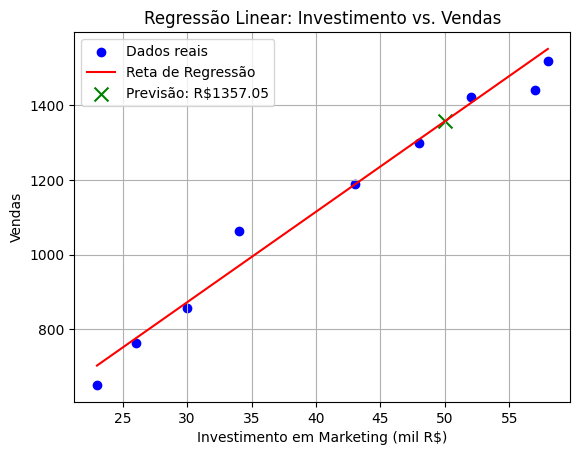

In [82]:
# Plotar resultados
plt.scatter(X, y, color='blue', label="Dados reais")
plt.plot(X, modelo.predict(X), color='red', label="Reta de Regressão")
plt.scatter(novo_investimento, nova_previsao, color='green', marker='x', s=100, label=f"Previsão: R${nova_previsao[0]:.2f}")
plt.xlabel("Investimento em Marketing (mil R$)")
plt.ylabel("Vendas")
plt.title("Regressão Linear: Investimento vs. Vendas")
plt.legend()
plt.grid(True)
plt.show()

In [87]:
dados.head(10)

,Investimentos (x),Vendas (y)
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190
5,48,1298
6,52,1421
7,57,1440
8,58,1518
9,60,1530



---



###**Novos Testes**

In [83]:
# Fazer previsões para 10 novos investimentos
novos_investimentos = np.array([[i] for i in range(50, 60)])  # 10 valores de investimento entre 50 e 59
previsoes = modelo.predict(novos_investimentos)

# Exibir as previsões
for i, previsao in zip(novos_investimentos.flatten(), previsoes):
    print(f"Previsão de vendas para R${i*1000:.2f} de investimento: {previsao:.2f}")

Previsão de vendas para R$50000.00 de investimento: 1357.05
Previsão de vendas para R$51000.00 de investimento: 1381.28
Previsão de vendas para R$52000.00 de investimento: 1405.51
Previsão de vendas para R$53000.00 de investimento: 1429.74
Previsão de vendas para R$54000.00 de investimento: 1453.97
Previsão de vendas para R$55000.00 de investimento: 1478.20
Previsão de vendas para R$56000.00 de investimento: 1502.43
Previsão de vendas para R$57000.00 de investimento: 1526.66
Previsão de vendas para R$58000.00 de investimento: 1550.89
Previsão de vendas para R$59000.00 de investimento: 1575.12


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [84]:
# Obter coeficientes de regressão
theta_0 = modelo.intercept_
theta_1 = modelo.coef_[0]
print(f"Equação da reta: y = {theta_0:.2f} + {theta_1:.2f}x")

Equação da reta: y = 145.50 + 24.23x


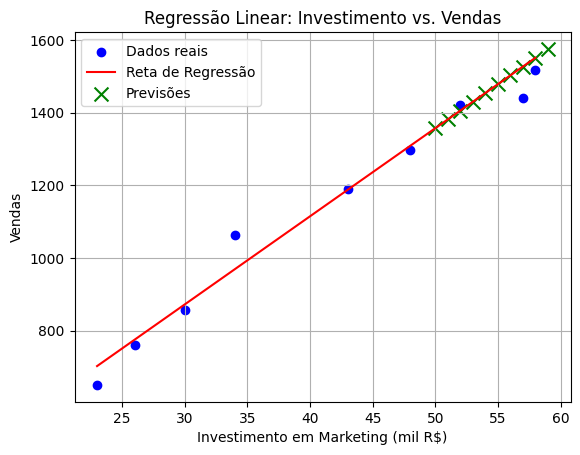

In [85]:
# Plotar resultados
plt.scatter(X, y, color='blue', label="Dados reais")
plt.plot(X, modelo.predict(X), color='red', label="Reta de Regressão")
plt.scatter(novos_investimentos, previsoes, color='green', marker='x', s=100, label="Previsões")
plt.xlabel("Investimento em Marketing (mil R$)")
plt.ylabel("Vendas")
plt.title("Regressão Linear: Investimento vs. Vendas")
plt.legend()
plt.grid(True)
plt.show()